In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Importing Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [4]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Scaling

In [6]:
df1 = df.copy() 
X = df1.drop(['url',' shares'], axis=1)
y = df1[' shares']

In [7]:
# Use MinMax Scalar, as it is appropriate scaling algorithm for KNN
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
X_scaled.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000588,0.000588,0.000588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.001089,0.001089,0.001089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000646,0.018973,0.003737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [10]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_scaled_pca = pca.transform(X_scaled)

In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

24

In [13]:
# variance by each component
pca.explained_variance_.round(2)

array([0.31, 0.29, 0.24, 0.2 , 0.19, 0.19, 0.18, 0.17, 0.17, 0.15, 0.13,
       0.12, 0.09, 0.08, 0.07, 0.07, 0.07, 0.06, 0.04, 0.03, 0.03, 0.03,
       0.03, 0.02])

In [14]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([10.1,  9.2,  7.9,  6.6,  6.2,  6.1,  6. ,  5.6,  5.4,  4.8,  4.2,
        3.9,  2.8,  2.5,  2.2,  2.2,  2.1,  2. ,  1.2,  1.1,  1. ,  0.9,
        0.8,  0.7])

In [15]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([10.1, 19.3, 27.2, 33.8, 40. , 46.1, 52.1, 57.7, 63.1, 67.9, 72.1,
       76. , 78.8, 81.3, 83.5, 85.7, 87.8, 89.8, 91. , 92.1, 93.1, 94. ,
       94.8, 95.5])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

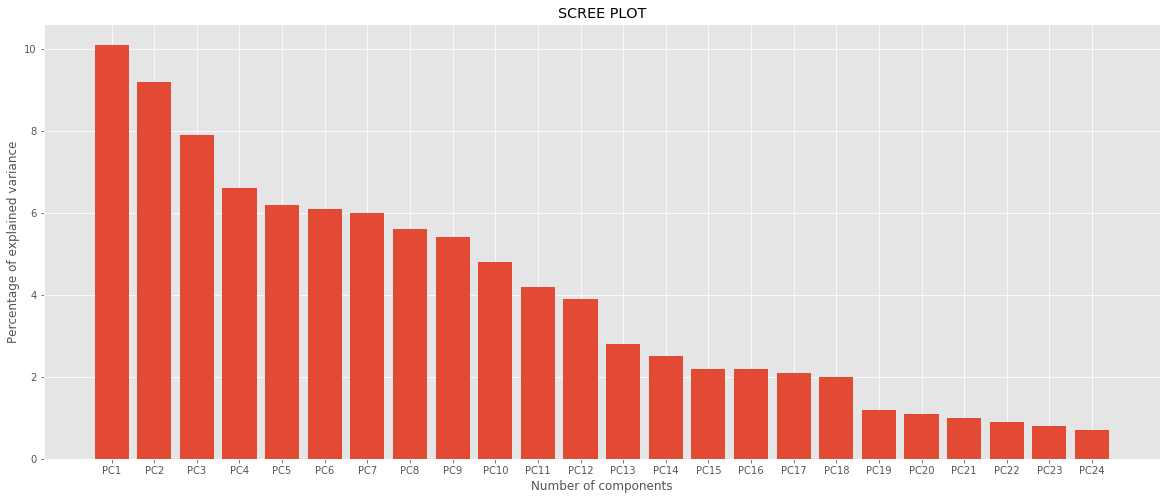

In [17]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("SCREE PLOT")
plt.show()

In [18]:
# pca
X_scaled_pca

array([[-5.33167763e-01, -5.84385814e-01, -1.51779514e-01, ...,
         1.68659999e-01, -8.66624066e-02, -1.67720240e-01],
       [-4.03412830e-01,  1.56890630e-01,  1.29490299e+00, ...,
        -1.08536787e-01, -3.31468778e-02,  1.01869219e-03],
       [-4.99464025e-01,  4.37280236e-01,  8.00504244e-01, ...,
         1.74489506e-01,  4.59812005e-01,  6.64997457e-02],
       ...,
       [-1.20500926e-01, -4.27056073e-01, -1.85174260e-01, ...,
         1.42649451e-01,  4.28177798e-02, -1.31385704e-01],
       [ 1.32622406e+00,  1.73045929e-01,  1.58487823e-01, ...,
        -1.02394313e-01, -9.26416970e-02,  1.37609016e-02],
       [-2.95482696e-01, -7.96101007e-01, -3.34140384e-01, ...,
         1.95876611e-01,  1.62101125e-03,  1.12800423e-02]])

# Train-Test Split

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size = 0.3, random_state = 0)

# Finding optimum value for "k"

## Finding "k" using thumb rule

In [20]:
# k = sqrt(N), where N stands for the number of samples in your training dataset

In [21]:
X_scaled_pca.shape

(39644, 24)

In [22]:
from numpy import sqrt
np.sqrt(39644)

199.1080108885627

## Looking at error rates for different values of "k"

In [23]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
rmse_val = [] #to store rmse values for different k
for K in range(1,2001,100):
    #K = K+50
    model = neighbors.KNeighborsRegressor(n_neighbors = K, n_jobs=-1)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14173.955215327416
RMSE value for k=  101 is: 8260.721055386572
RMSE value for k=  201 is: 8228.375495260734
RMSE value for k=  301 is: 8208.250351287654
RMSE value for k=  401 is: 8200.086506019565
RMSE value for k=  501 is: 8197.254825322718
RMSE value for k=  601 is: 8199.232536406415
RMSE value for k=  701 is: 8200.909839050348
RMSE value for k=  801 is: 8201.824246519454
RMSE value for k=  901 is: 8200.550012917203
RMSE value for k=  1001 is: 8200.223973988128
RMSE value for k=  1101 is: 8199.613779442201
RMSE value for k=  1201 is: 8200.089619636046
RMSE value for k=  1301 is: 8200.999985049784
RMSE value for k=  1401 is: 8200.122827241725
RMSE value for k=  1501 is: 8200.914205197105
RMSE value for k=  1601 is: 8200.579471542847
RMSE value for k=  1701 is: 8200.141083099761
RMSE value for k=  1801 is: 8200.408333054816
RMSE value for k=  1901 is: 8200.900970474471


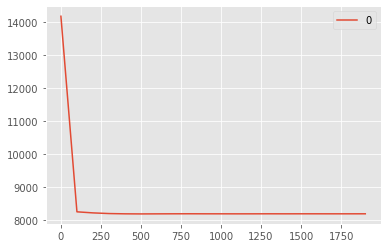

In [25]:
#plotting the rmse values against k values

curve_11 = pd.DataFrame(rmse_val) #elbow curve 

l = []
for i in range(1,2001,100):
    l.append(i)
curve_12 = curve_11.T
curve_12.columns = l
curve_12.T.plot()
plt.show()

In [26]:
rmse_val = [] #to store rmse values for different k
for K in range(400,801,10):
    #K = K+10
    model = neighbors.KNeighborsRegressor(n_neighbors = K, n_jobs=-1)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  400 is: 8200.412499355014
RMSE value for k=  410 is: 8201.068946623775
RMSE value for k=  420 is: 8199.7697979676
RMSE value for k=  430 is: 8199.856057594403
RMSE value for k=  440 is: 8198.283522294416
RMSE value for k=  450 is: 8198.664488621116
RMSE value for k=  460 is: 8197.045757176425
RMSE value for k=  470 is: 8197.646497997752
RMSE value for k=  480 is: 8197.551069578305
RMSE value for k=  490 is: 8197.326514289403
RMSE value for k=  500 is: 8197.010773843489
RMSE value for k=  510 is: 8197.040792609474
RMSE value for k=  520 is: 8197.070044154572
RMSE value for k=  530 is: 8197.559328547357
RMSE value for k=  540 is: 8198.552309410092
RMSE value for k=  550 is: 8199.486410777103
RMSE value for k=  560 is: 8199.429032170792
RMSE value for k=  570 is: 8198.664736878976
RMSE value for k=  580 is: 8199.357751865606
RMSE value for k=  590 is: 8199.314309328645
RMSE value for k=  600 is: 8199.374444912346
RMSE value for k=  610 is: 8198.837398470012
RMSE value f

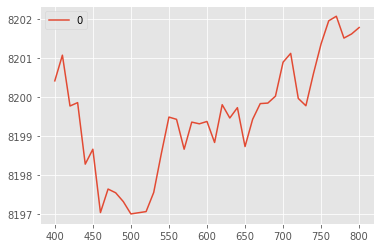

In [27]:
#plotting the rmse values against k values

curve_21 = pd.DataFrame(rmse_val) #elbow curve 

m = []
for i in range(400,801,10):
    m.append(i)
curve_22 = curve_21.T
curve_22.columns = m
curve_22.T.plot()
plt.show()

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(450,551,1):
    #K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, n_jobs=-1)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  450 is: 8198.664488621116
RMSE value for k=  451 is: 8198.679771036446
RMSE value for k=  452 is: 8198.485454976244
RMSE value for k=  453 is: 8198.54310068909
RMSE value for k=  454 is: 8197.545271574021
RMSE value for k=  455 is: 8197.647277426362
RMSE value for k=  456 is: 8197.374020568774
RMSE value for k=  457 is: 8197.332752892988
RMSE value for k=  458 is: 8197.225834261242
RMSE value for k=  459 is: 8197.045389005361
RMSE value for k=  460 is: 8197.045757176425
RMSE value for k=  461 is: 8197.128054168401
RMSE value for k=  462 is: 8197.14734205426
RMSE value for k=  463 is: 8197.408904571343
RMSE value for k=  464 is: 8197.675825752585
RMSE value for k=  465 is: 8197.77917728585
RMSE value for k=  466 is: 8198.05702921564
RMSE value for k=  467 is: 8197.758964745
RMSE value for k=  468 is: 8197.765909872352
RMSE value for k=  469 is: 8197.62296623132
RMSE value for k=  470 is: 8197.646497997752
RMSE value for k=  471 is: 8197.6368071343
RMSE value for k=  4

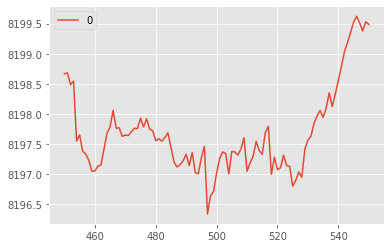

In [29]:
#plotting the rmse values against k values

curve_31 = pd.DataFrame(rmse_val) #elbow curve 

n = []
for i in range(450,551,1):
    n.append(i)
curve_32 = curve_31.T
curve_32.columns = n
curve_32.T.plot()
plt.show()

In [30]:
# we hance see that 683 neighbors is the optimum neighbors required for KNN, DBSCAN
# if we scale X or the whole dataframe we arrive at the same number of neighbors =, ie 683

# 497

## RandomSearchCV for finding "k" 

### Building Base model

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [32]:

# Create knn object
knn = KNeighborsRegressor()

#Training the model.
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [33]:
# Predict train data set
y_pred_train = knn.predict(X_train)

# Predict test data set
y_pred_test = knn.predict(X_test)


In [34]:
print('R² of Train data:', r2_score(y_train, y_pred_train))
print('RMSE of Train data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R² of Test data:', r2_score(y_test, y_pred_test))
print('RMSE of Test data:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R² of Train data: 0.1920110589370112
RMSE of Train data: 11505.957981902191
R² of Test data: -0.35648748956086074
RMSE of Test data: 9623.944893750615


### Finding default parameters of the model

In [35]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Random Search Cross Validation

In [36]:
from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters that we want to tune.

# leaf_size = list(range(1,200,30))

n_neighbors = list(range(1,1000,100))

p=[1,2]

weights = ['uniform','distance']

# algorithm = ['auto','ball_tree','kd_tree','brute']
             
# Create the random grid
random_grid = {
 #'leaf_size': leaf_size,
 'n_neighbors': n_neighbors,
 'p': p,
 'weights': weights}

In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid,
                              n_iter = 10, scoring='r2', 
                              cv = 3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
knn_random.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished


In [38]:
knn_random.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 701}

# Nearest Neighbors

In [39]:
# Let's use Nearest Neighbors algorithm to determine the distance matrix

from sklearn. neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=701, n_jobs=-1)
nbrs = neigh.fit(X_scaled_pca)
distances, indices = nbrs.kneighbors(X_scaled_pca)

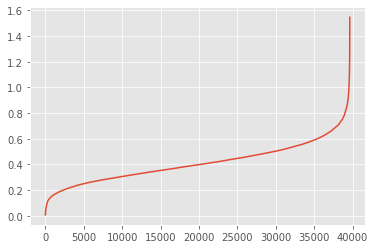

In [40]:
# The optimal value for epsilon will be found at the point of maximum curvature

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

## Combining PCA components with independent variable "y"

In [41]:
df2 = df1.drop(['url'], axis=1)
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [42]:
# Use MinMax Scalar, as it is appropriate scaling algorithm for KNN

# Let us also scale "y"
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

df2_scaled = sc.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)
df2_scaled.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000588,0.000588,0.000588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.000702
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.000842
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.001089,0.001089,0.001089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0.001778
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.001422
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000646,0.018973,0.003737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.000598


In [43]:
# converting X_scaled_pca to a Dataframe to be concated with y
pc = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22","PC23","PC24"]
X_scaled_pca_df = pd.DataFrame(X_scaled_pca, columns=pc)
X_scaled_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.533168,-0.584386,-0.151780,0.077262,-0.277035,0.125086,0.146919,1.180835,0.818095,-0.266384,-0.060310,0.384393,0.295035,0.145098,-0.236356,-0.108954,0.007952,0.067699,-0.240721,-0.131677,-0.010380,0.168660,-0.086662,-0.167720
1,-0.403413,0.156891,1.294903,-0.168107,0.243924,0.014266,0.093502,1.033110,0.468436,-0.182229,0.417651,0.268164,0.074304,0.161299,0.144519,-0.059334,0.046139,-0.029666,-0.265101,0.000300,0.037394,-0.108537,-0.033147,0.001019
2,-0.499464,0.437280,0.800504,-0.211849,0.252253,0.037159,0.125656,1.067460,0.570790,-0.199852,-0.071535,-0.377679,0.007322,0.175898,0.076956,-0.068602,-0.110773,-0.265562,-0.221802,0.004704,0.095873,0.174490,0.459812,0.066500
3,-0.040112,-0.274606,-0.145440,-0.794304,0.196991,0.100176,0.198775,1.109395,0.837590,-0.272309,-0.038586,0.227956,0.243498,0.158407,0.039141,0.026371,0.044729,0.022201,-0.067507,-0.121161,-0.022339,-0.012010,-0.215690,-0.045172
4,-0.774280,0.992620,-0.469609,0.357582,-0.325027,0.098592,0.148714,1.097478,0.439386,-0.208137,0.093474,-0.078781,0.144220,0.034340,-0.086171,-0.324938,-0.053875,-0.033334,-0.189120,-0.052548,0.116782,0.004757,0.096251,-0.040173


In [46]:
# combining X scaled PCA components with Y dependent variable
pca_df = pd.concat([X_scaled_pca_df, y], axis=1)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,shares
0,-0.533168,-0.584386,-0.151780,0.077262,-0.277035,0.125086,0.146919,1.180835,0.818095,-0.266384,-0.060310,0.384393,0.295035,0.145098,-0.236356,-0.108954,0.007952,0.067699,-0.240721,-0.131677,-0.010380,0.168660,-0.086662,-0.167720,593
1,-0.403413,0.156891,1.294903,-0.168107,0.243924,0.014266,0.093502,1.033110,0.468436,-0.182229,0.417651,0.268164,0.074304,0.161299,0.144519,-0.059334,0.046139,-0.029666,-0.265101,0.000300,0.037394,-0.108537,-0.033147,0.001019,711
2,-0.499464,0.437280,0.800504,-0.211849,0.252253,0.037159,0.125656,1.067460,0.570790,-0.199852,-0.071535,-0.377679,0.007322,0.175898,0.076956,-0.068602,-0.110773,-0.265562,-0.221802,0.004704,0.095873,0.174490,0.459812,0.066500,1500
3,-0.040112,-0.274606,-0.145440,-0.794304,0.196991,0.100176,0.198775,1.109395,0.837590,-0.272309,-0.038586,0.227956,0.243498,0.158407,0.039141,0.026371,0.044729,0.022201,-0.067507,-0.121161,-0.022339,-0.012010,-0.215690,-0.045172,1200
4,-0.774280,0.992620,-0.469609,0.357582,-0.325027,0.098592,0.148714,1.097478,0.439386,-0.208137,0.093474,-0.078781,0.144220,0.034340,-0.086171,-0.324938,-0.053875,-0.033334,-0.189120,-0.052548,0.116782,0.004757,0.096251,-0.040173,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-0.291879,0.865475,-0.282924,-0.263200,-0.151368,0.692572,-0.345667,-0.421261,-0.693007,-0.167355,-0.227477,-0.052205,0.210214,0.069704,0.000172,-0.064778,-0.055715,-0.003843,0.027377,-0.122381,0.254496,0.004882,-0.004198,-0.097131,1800
39640,-0.110959,-0.433874,-0.163935,0.274104,-0.424619,0.717474,-0.378900,-0.383733,-0.322000,-0.059215,0.439743,-0.331931,-0.079138,-0.585695,-0.136479,0.128111,0.270957,0.627335,-0.075713,-0.183572,0.325931,0.021831,0.012552,0.643938,1900
39641,-0.120501,-0.427056,-0.185174,0.230282,-0.416375,0.723401,-0.380536,-0.375002,-0.434480,-0.095622,0.171762,-0.275924,-0.236263,0.203772,-0.438127,-0.180639,-0.094587,0.009433,0.060862,0.005868,0.242853,0.142649,0.042818,-0.131386,1900
39642,1.326224,0.173046,0.158488,-0.302951,-0.106538,0.732663,-0.339066,-0.255766,-0.129382,-0.193515,-0.050177,0.172192,-0.139159,0.144041,-0.031826,0.041793,0.049477,0.106098,-0.285849,0.070993,0.102413,-0.102394,-0.092642,0.013761,1100


In [47]:
pca_df.shape

(39644, 25)

# Clustering

## Density Based Clustering - DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

epsilon = 0.7
minimumSamples = 26    # we use number of min_samples>=dimensions+1 
db = DBSCAN(eps=epsilon, min_samples=minimumSamples, n_jobs=-1).fit(pca_df)
labels = db.labels_
labels

array([-1, -1, -1, ..., -1,  2, -1], dtype=int64)

## Adding CLuster Labels o the dataset

In [49]:
pca_df['clusters'] = db.labels_

In [50]:
pca_df['clusters'].value_counts()

-1    39376
 0       58
 1       55
 3       48
 2       44
 5       32
 4       31
Name: clusters, dtype: int64

In [51]:
# majority of the data have been clasified as outliers

**Why it dint work:**

* Does not work well when dealing with clusters of varying densities. While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density.

* Struggles with high dimensionality data. DBSCAN is great at contorting the data into different dimensions and shapes. However, DBSCAN can only go so far, if given data with too many dimensions, DBSCAN suffers.

## Cluster Profiling

In [55]:
df3 = pca_df[pca_df['clusters']!=-1]
df3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,shares,clusters
5173,1.148288,0.325786,0.162766,-0.261235,-0.044324,0.796697,-0.285667,-0.078694,0.567899,-0.151324,-0.000106,-0.133952,-0.034522,-0.069032,0.092237,-0.150731,0.011689,-0.030227,0.162161,-0.039608,-0.219727,-0.172033,-0.140996,0.059241,1100,2
5500,1.107200,0.359746,0.236212,-0.277653,-0.081876,0.785256,-0.295090,-0.124135,0.424969,-0.137122,0.302689,0.247435,0.065241,-0.176425,0.172554,-0.102006,0.046709,0.000814,-0.086021,0.155152,-0.337499,0.055551,-0.094836,0.001905,1100,2
5557,1.068165,0.127089,0.147009,-0.192235,0.004287,-0.075277,0.817361,-0.289183,0.255914,-0.146652,0.103288,-0.335143,0.424518,0.126962,0.064098,-0.126659,-0.056993,-0.100776,0.166270,0.015746,-0.302764,-0.097405,-0.059065,0.043989,1100,4
5853,1.106375,0.331783,0.234527,-0.283866,-0.072111,0.787063,-0.293888,-0.115454,0.450688,-0.143269,0.201511,0.139735,0.093996,-0.086238,0.122798,-0.097844,0.049521,0.031762,-0.156769,0.162717,-0.314385,0.235380,-0.098078,0.034324,1200,3
6518,0.904249,0.317516,0.117734,-0.317675,-0.101257,-0.637794,-0.462229,-0.181825,0.277742,-0.127262,0.261732,-0.041392,0.542872,0.158128,0.033061,0.036600,-0.084090,-0.127600,-0.106621,0.111017,-0.340936,-0.107141,0.206189,0.086418,1100,1


# Multi-Class Classification

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

## Splitting the data

In [58]:
df3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,shares,clusters
5173,1.148288,0.325786,0.162766,-0.261235,-0.044324,0.796697,-0.285667,-0.078694,0.567899,-0.151324,-0.000106,-0.133952,-0.034522,-0.069032,0.092237,-0.150731,0.011689,-0.030227,0.162161,-0.039608,-0.219727,-0.172033,-0.140996,0.059241,1100,2
5500,1.107200,0.359746,0.236212,-0.277653,-0.081876,0.785256,-0.295090,-0.124135,0.424969,-0.137122,0.302689,0.247435,0.065241,-0.176425,0.172554,-0.102006,0.046709,0.000814,-0.086021,0.155152,-0.337499,0.055551,-0.094836,0.001905,1100,2
5557,1.068165,0.127089,0.147009,-0.192235,0.004287,-0.075277,0.817361,-0.289183,0.255914,-0.146652,0.103288,-0.335143,0.424518,0.126962,0.064098,-0.126659,-0.056993,-0.100776,0.166270,0.015746,-0.302764,-0.097405,-0.059065,0.043989,1100,4
5853,1.106375,0.331783,0.234527,-0.283866,-0.072111,0.787063,-0.293888,-0.115454,0.450688,-0.143269,0.201511,0.139735,0.093996,-0.086238,0.122798,-0.097844,0.049521,0.031762,-0.156769,0.162717,-0.314385,0.235380,-0.098078,0.034324,1200,3
6518,0.904249,0.317516,0.117734,-0.317675,-0.101257,-0.637794,-0.462229,-0.181825,0.277742,-0.127262,0.261732,-0.041392,0.542872,0.158128,0.033061,0.036600,-0.084090,-0.127600,-0.106621,0.111017,-0.340936,-0.107141,0.206189,0.086418,1100,1


In [59]:
y = df3['clusters']
X = df3.drop(['clusters'], axis=1)

## Checking for class Imbalance

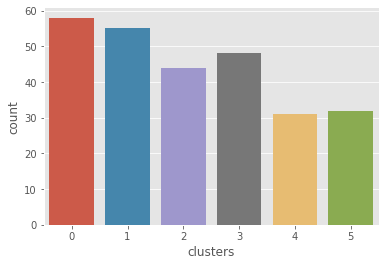

In [60]:
sns.countplot(data=df3, x='clusters')
plt.show()

In [61]:
df3['clusters'].value_counts(normalize=True, ascending=False)*100

0    21.641791
1    20.522388
3    17.910448
2    16.417910
5    11.940299
4    11.567164
Name: clusters, dtype: float64

In [ ]:
# the class labels are better balanced than from KMeans

## Modelling

### Decision Tree (Hyper-Parameter Tuned)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### Random Search Cross Validation

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,30)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 30),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10]}


In [64]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 0)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X, y);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.4s finished


In [65]:
dt_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': None,
 'max_depth': 20,
 'criterion': 'gini'}

In [66]:
# cv results
cv_results_dt = pd.DataFrame(dt_random.cv_results_)
cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073072,0.000000,0.012201,0.000000e+00,10,29,auto,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.354711,0.532077,0.530711,0.513606,0.594010,0.505023,0.079972,45,0.561457,0.545202,0.556178,0.542085,0.553474,0.551679,0.007114
1,0.046243,0.032883,0.008120,5.154899e-03,5,19,log2,21,gini,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.685870,0.621199,0.550070,0.739103,0.661242,0.651497,0.063493,30,0.756634,0.715285,0.679872,0.692625,0.774648,0.723813,0.036435
2,0.005603,0.001958,0.004799,1.607025e-03,5,44,sqrt,20,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.308172,0.432598,0.374636,0.383249,0.421540,0.384039,0.043839,54,0.371436,0.428302,0.411983,0.442520,0.426864,0.416221,0.024391
3,0.005600,0.001960,0.004000,9.488940e-07,2,10,auto,24,gini,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.799959,0.847247,0.723394,0.789759,0.739862,0.780044,0.044342,19,0.929882,0.871712,0.840575,0.850921,0.823770,0.863372,0.036705
4,0.005601,0.001959,0.004000,2.902838e-06,2,26,auto,25,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.365548,0.561104,0.534110,0.518727,0.594010,0.514700,0.078845,43,0.561381,0.526686,0.574556,0.555888,0.557452,0.555193,0.015694


In [67]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", dt_random.best_score_)
dt_random_best = dt_random.best_estimator_
print(dt_random.best_estimator_)

best accuracy 1.0
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


#### Running the model with best parameters obtained from Random Search CV

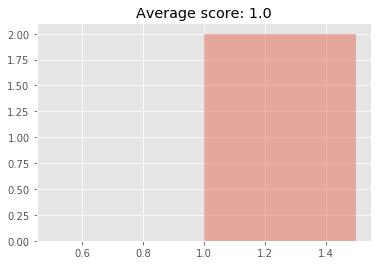

In [68]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_dt = cross_val_score(dt_random_best, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_dt)
plt.title('Average score: {}'.format(np.mean(cv_results_dt)))
plt.show()

### Random Forest

In [69]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.1s finished


In [72]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [73]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023200,0.004665,0.000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.028800,0.001600,0.004,0.000001,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.851852,0.829435,0.829435,0.849057,0.826216,0.837199,0.010922,12,0.843731,0.844237,0.844237,0.844458,0.850184,0.845369,0.002419
2,0.053600,0.009667,0.000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.020000,0.012133,0.000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.016001,0.007999,0.000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 1.0
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

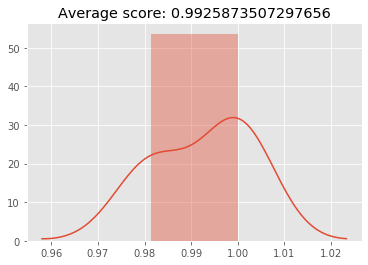

In [75]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_rf)
plt.title('Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

### Decision Tree: Bagging 

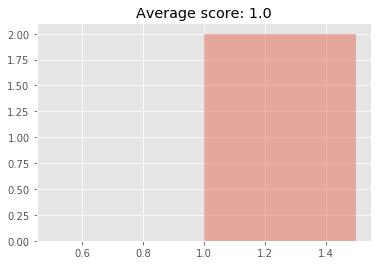

In [76]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_dt = BaggingClassifier(base_estimator=dt_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_dt = cross_val_score(bg_dt, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_bg_dt)
plt.title('Average score: {}'.format(np.mean(cv_results_bg_dt)))
plt.show()

### Random Forest: Bagging

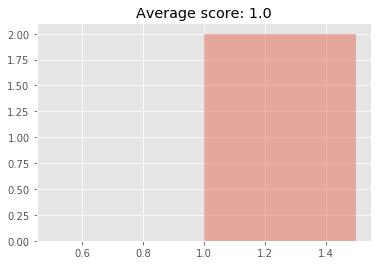

In [77]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_rf = BaggingClassifier(base_estimator=rf_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_rf = cross_val_score(bg_rf, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_bg_rf)
plt.title('Average score: {}'.format(np.mean(cv_results_bg_rf)))
plt.show()

### Decision Tree: Boosting

#### Ada Boost:

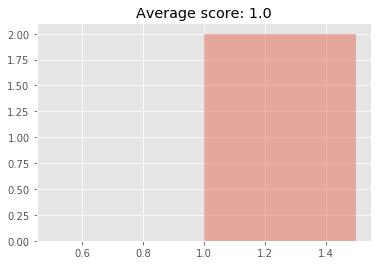

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ab_dt = AdaBoostClassifier(base_estimator=dt_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_dt = cross_val_score(ab_dt, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_ab_dt)
plt.title('Average score: {}'.format(np.mean(cv_results_ab_dt)))
plt.show()

#### Gradient Boost

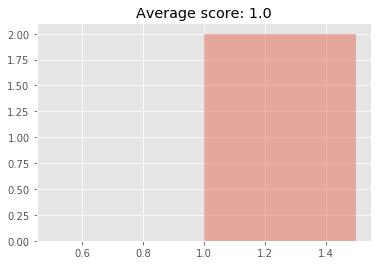

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_gb_dt = cross_val_score(gb_dt, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_gb_dt)
plt.title('Average score: {}'.format(np.mean(cv_results_gb_dt)))
plt.show()

#### XG Boost

In [80]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_dt = xgb.XGBClassifier(random_state = 0)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

xg_random = RandomizedSearchCV(xgb_dt,
                    parameters, n_jobs=-1,
                    scoring="f1_weighted",
                    cv=5, n_iter = 15,verbose=2, random_state=0,
                    return_train_score=True)

xg_random.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_

In [81]:
xg_random.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'gamma': 0.0,
 'eta': 0.3,
 'colsample_bytree': 0.5}

In [82]:
# cv results
cv_results_xg = pd.DataFrame(xg_random.cv_results_)
cv_results_xg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247999,0.009122,0.005601,1.959372e-03,1,6,0,0.3,0.5,"{'min_child_weight': 1, 'max_depth': 6, 'gamma...",1.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.199199,0.012496,0.004000,5.091228e-07,7,6,0.1,0.25,0.5,"{'min_child_weight': 7, 'max_depth': 6, 'gamma...",1.000000,1.0,1.0,1.0,0.961456,0.992291,0.015418,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.215200,0.016080,0.007201,4.665053e-03,3,10,0.1,0.25,0.4,"{'min_child_weight': 3, 'max_depth': 10, 'gamm...",1.000000,1.0,1.0,1.0,0.981000,0.996200,0.007600,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.277601,0.020334,0.004001,2.092658e-06,1,3,0.2,0.15,0.7,"{'min_child_weight': 1, 'max_depth': 3, 'gamma...",1.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.187200,0.015471,0.007200,4.663769e-03,7,3,0.1,0.3,0.3,"{'min_child_weight': 7, 'max_depth': 3, 'gamma...",0.981307,1.0,1.0,1.0,0.961456,0.988553,0.015361,14,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [83]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xg_random.best_score_)
xg_random_best = xg_random.best_estimator_
print(xg_random_best)

best accuracy 1.0
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.3, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


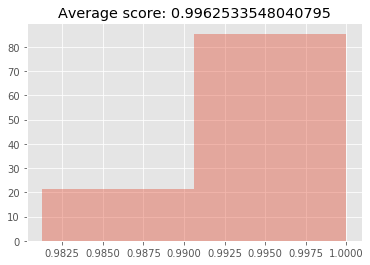

In [84]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_xg = cross_val_score(xg_random_best, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_xg)
plt.title('Average score: {}'.format(np.mean(cv_results_xg)))
plt.show()

### Random Forest: Boosting

#### Ada Boost

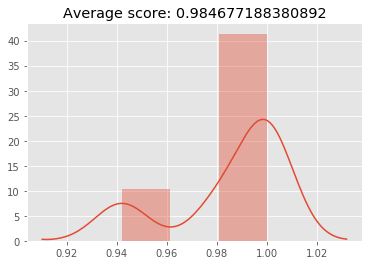

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ab_rf = AdaBoostClassifier(base_estimator=rf_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_rf = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_ab_rf)
plt.title('Average score: {}'.format(np.mean(cv_results_ab_rf)))
plt.show()